### План выполнения проекта ###

 [Шаг 1. Изучение общей информации](#step1)
 
 
 [Шаг 2. Подготовка данных](#step2)
 
 
 [Шаг 3. Анализ поведения абонентов тарифов Ультра и Смарт](#step3)
 
 
 [Шаг 4. Проверка статистических гипотез](#step4)
 
 
 [Шаг 5. Выводы](#step5)



## <a id="step1">Шаг 1. Изучение общей информации </a>


In [1]:
# импорт всех библиотек, необходимых для работы.

import pandas as pd

from scipy import stats as st
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
users = pd.read_csv('/datasets/users.csv')
users.info()
display(users.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
203,1203,39,NaN,Москва,Владимир,Григорьев,2018-03-13,ultra
400,1400,71,NaN,Москва,Ренат,Артёмов,2018-08-24,smart
308,1308,52,NaN,Москва,Инесса,Корнилова,2018-01-04,smart
297,1297,66,NaN,Иркутск,Радим,Абрамцев,2018-12-04,smart
116,1116,65,NaN,Петрозаводск,Альберта,Шевцова,2018-04-17,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
357,1357,37,NaN,Томск,Касьян,Ермилов,2018-09-02,smart
323,1323,67,NaN,Челябинск,Эсмеральда,Носкова,2018-08-02,smart
437,1437,73,NaN,Казань,Лилия,Селезнева,2018-08-03,smart
178,1178,56,NaN,Москва,Наталья,Жарова,2018-05-15,smart


В данном датасете представлена информация о пользователях. 

`churn_date` - дата прекращения договора. И пропущенные значения - индикатор того, что пользователь и далее продолжает пользоваться данной телефонной связью и тарифом.

Необходимо изменить тип данных на тип datetime в столбцах `churn_date` и `reg_date` для дальнейшей работы с этими данными.


In [3]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.info()
display(tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В датасете `tariffs` находится две строчки с информацией о двух тарифах - Ультра и Смарт. Типы данных в порядке.

In [4]:
calls = pd.read_csv('/datasets/calls.csv')
calls.info()
display(calls.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
30975,1078_319,2018-11-01,0.00,1078
136582,1348_58,2018-11-02,0.00,1348
125671,1323_194,2018-08-23,10.34,1323
180121,1450_139,2018-11-01,8.12,1450
114919,1294_259,2018-07-21,3.02,1294
173216,1427_580,2018-06-16,0.00,1427
47273,1118_562,2018-08-01,14.11,1118
107092,1276_39,2018-12-13,0.00,1276
17599,1048_389,2018-12-06,0.00,1048
129026,1330_890,2018-05-08,7.64,1330


Таблица `calls` содержит данные о звонках абонентов с указанием даты в `call_date`, необходимо поменять тип данных на datetime.

In [5]:
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
# в датафрейме содержится столбец Unnamed: 0, который дублирует индекс, поэтому сразу опустим индекс, 
# index_col=0 - присваивает как индекс первый столбец
internet.info()
display(internet.sample(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
89762,1303_30,368.07,2018-10-20,1303
30840,1108_14,854.71,2018-11-02,1108
14120,1049_104,106.68,2018-04-20,1049
88637,1300_9,802.66,2018-11-05,1300
28599,1099_263,397.64,2018-12-08,1099
134746,1452_284,555.97,2018-11-02,1452
134740,1452_278,222.73,2018-11-08,1452
105190,1356_189,932.39,2018-06-09,1356
8162,1027_489,647.10,2018-09-05,1027
101621,1340_332,365.62,2018-02-22,1340


В `internet` можно найти данные о интернет-сессиях пользователей. 

Тут присутствует столбец `Unnamed: 0`, данные в нем, кажется, соответствуют индексу. Нужно это узнать на практике.
В столбце `session_date` необходимо поменять тип данных на datetime.

In [6]:
messages = pd.read_csv('/datasets/messages.csv')
messages.info()
display(messages.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
68393,1289_152,2018-12-11,1289
78714,1330_740,2018-08-04,1330
28796,1124_259,2018-10-18,1124
82896,1344_960,2018-08-26,1344
26919,1113_78,2018-06-04,1113
66332,1282_764,2018-11-20,1282
26051,1106_204,2018-05-29,1106
40432,1171_576,2018-11-07,1171
75163,1318_192,2018-10-02,1318
72775,1308_235,2018-11-14,1308


В датасете `messages` расположены данные о переданных сообщениях пользователей, здесь также нужно поменять тип данных в `message_date` с object на datetime.

## <a id="step2">Шаг 2. Подготовка и анализ данных</a>


### Приводим данные к нужным типам

Приведем данные с датой к их действительному типу `datetime` в датасетах `users, calls, internet, messages`.

In [7]:
display(users.sample(10))
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
278,1278,46,NaN,Новокузнецк,Леонид,Троицкий,2018-12-23,smart
160,1160,73,NaN,Ульяновск,Борис,Авдонюшкин,2018-07-03,smart
222,1222,44,NaN,Уфа,Пётр,Булгаков,2018-08-30,ultra
364,1364,74,NaN,Екатеринбург,Мстислав,Алексеенко,2018-08-29,ultra
420,1420,53,NaN,Сочи,Анатолий,Корольков,2018-09-19,smart
350,1350,40,NaN,Омск,Варвара,Козырева,2018-08-30,ultra
416,1416,50,2018-12-14,Санкт-Петербург,Валерия,Ёлчина,2018-07-16,ultra
43,1043,69,NaN,Ставрополь,Марианна,Родионова,2018-07-08,smart
269,1269,31,NaN,Омск,Аким,Ахмадулин,2018-07-17,smart
215,1215,55,NaN,Рязань,Руслан,Алиев,2018-08-12,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


В столбце `churn_date` тоже следовало бы заменить данные, но так как мы пользоваться данными при анализе не будем, оставим все как есть.

In [8]:
display(calls.sample(10))
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

,id,call_date,duration,user_id
56534,1143_598,2018-08-22,5.52,1143
150796,1377_1643,2018-04-13,10.42,1377
129936,1332_247,2018-09-30,6.52,1332
198381,1486_214,2018-12-14,14.34,1486
2098,1005_695,2018-12-07,8.15,1005
22340,1057_789,2018-11-21,9.92,1057
197415,1483_364,2018-08-25,10.93,1483
999,1003_292,2018-11-17,1.62,1003
201078,1495_465,2018-12-28,0.00,1495
56892,1144_263,2018-10-06,0.98,1144


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [9]:
display(internet.sample(10))
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

,id,mb_used,session_date,user_id
29591,1104_8,433.57,2018-10-17,1104
125310,1421_495,0.00,2018-12-20,1421
1230,1005_150,839.35,2018-11-25,1005
50936,1174_144,606.61,2018-10-06,1174
76959,1260_63,687.47,2018-11-29,1260
91601,1310_62,212.80,2018-10-18,1310
4635,1014_241,0.00,2018-12-05,1014
72694,1245_59,454.91,2018-11-04,1245
109193,1373_115,0.00,2018-02-27,1373
127363,1427_182,1181.56,2018-10-02,1427


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


In [10]:
display(messages.sample(10))
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

,id,message_date,user_id
86165,1356_1182,2018-11-17,1356
66931,1285_119,2018-05-04,1285
13435,1056_17,2018-05-17,1056
110835,1449_176,2018-10-12,1449
80504,1335_416,2018-08-07,1335
116592,1473_68,2018-09-22,1473
88108,1369_33,2018-12-07,1369
47246,1209_180,2018-11-01,1209
60696,1268_11,2018-11-01,1268
78024,1330_50,2018-04-09,1330


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Во всех датасетах в столбцах с датой был изменен тип данных на datetime для последующей работы с ними.

### Обработка нулевых значений

Для начала рассмотрим датасет `calls`, где есть нулевые значения в столбце `duration`.

In [11]:
calls.info()
display(calls[calls['duration'] == 0])
print('Количество строчек с пропущенными вызовами: ', len(calls[calls['duration'] == 0]))
print('Доля строчек с пропущенными вызовами: {:.1%}'.format(len(calls[calls['duration'] == 0])/len(calls)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
9,1000_9,2018-08-15,0.0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499
202592,1499_205,2018-10-13,0.0,1499
202593,1499_206,2018-12-26,0.0,1499
202594,1499_207,2018-10-28,0.0,1499


Количество строчек с пропущенными вызовами:  39613
Доля строчек с пропущенными вызовами: 19.6%


Строчек с пропущенными вызовами очень много, почти 20%. Это очень много для пропущенных звонков. И для количества строк, которые нужно удалить.

Тем не менее, мы видим, что в данных с нулевыми значениями - вещественный тип данный с один знаком после запятой (0.0). Вполне возможно, что данные звонки продолжались менее 0.05 минуты, что составляет 3 секунды. Такое может произойти, если на другом конце провода - автоответчик или горячая линия, с вестью о том, что вы - 10ые в очереди. А времени в обрез.

Вряд ли в детализации вызовов отображались бы и пропущенные вызовы. Похоже, что теория о менее, чем 3хсекундном звонке верна. Так как оператор округляет такие звонки в бОльшую сторону, так и сделаем. Присвоим значение 1 данным звонкам в 0 минут. 

In [12]:
calls['duration'] = calls['duration'].replace(0, 1)
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


Теперь необходимо округлить значения в столбце `duration` в сторону бОльшего целого числа, так как оператор округляет таким образом при подсчете затраченных минут.

In [13]:
print(calls['duration'].head())
calls['duration'] = calls['duration'].apply(lambda x: math.ceil(x))
print(calls['duration'].head())


0     1.00
1     1.00
2     2.85
3    13.80
4     5.18
Name: duration, dtype: float64
0     1
1     1
2     3
3    14
4     6
Name: duration, dtype: int64


Теперь посмотрим на данные в таблице `internet`

Проанализируем нулевые интернет-сессии:

In [14]:
display(internet[internet['mb_used'] == 0])
print('Количество строчек с 0 мб: ', len(internet[internet['mb_used'] == 0]))
print('Доля строчек с с 0 мб: {:.1%}'.format(len(internet[internet['mb_used'] == 0])/len(internet)))

,id,mb_used,session_date,user_id
11,1000_11,0.0,2018-08-28,1000
38,1000_38,0.0,2018-11-27,1000
46,1000_46,0.0,2018-06-30,1000
67,1000_67,0.0,2018-06-16,1000
72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...
149380,1499_141,0.0,2018-12-11,1499
149381,1499_142,0.0,2018-11-01,1499
149383,1499_144,0.0,2018-11-27,1499
149386,1499_147,0.0,2018-10-21,1499


Количество строчек с 0 мб:  19598
Доля строчек с с 0 мб: 13.1%


Каким образом объём потраченного за сессию интернет-трафика может быть нулевым? Никаким.
Так как данные в этом столбце типа float с 1 знаком после 0, то скорее всего, данные были переданы или получены в том размере, который был ошибочно округлен до 0.0 с 0.001 мб, к примеру. Очень похоже на push-уведомления или обновление погоды. 

Мы не можем удалить данные строки, так как оператор округляет до целого мб любое значение. Если зафиксированная сессия интернет-трафика, то значение не может быть нулевым. Заменим значения на 1.


In [15]:
internet['mb_used'] = internet['mb_used'].replace(0, 1)
print('Количество строчек с 0 мб: ', len(internet[internet['mb_used'] == 0]))

Количество строчек с 0 мб:  0



Округлим все остальные значения в данном столбце до бОльшего целого числа.

In [16]:
print(internet['mb_used'].head())
internet['mb_used'] = internet['mb_used'].apply(lambda x: math.ceil(x))
print(internet['mb_used'].head())

0     112.95
1    1052.81
2    1197.26
3     550.27
4     302.56
Name: mb_used, dtype: float64
0     113
1    1053
2    1198
3     551
4     303
Name: mb_used, dtype: int64


### Добавление данных по пользователям 

Для того, чтобы произвести подсчет по вышеуказанным пунктам, необходимо в таблицу calls, internet и messages добавить столбец с месяцем использования связи.

In [17]:
internet.info()
internet['month'] = internet['session_date'].apply(lambda x: x.month)
print(internet['month'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.7+ MB
0         11
1          9
2          6
3          8
4          9
          ..
149391    10
149392    12
149393    10
149394    11
149395    10
Name: month, Length: 149396, dtype: int64


In [18]:
calls.info()
calls['month'] = calls['call_date'].apply(lambda x: x.month)
print(calls['month'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB
0          7
1          8
2          6
3          9
4         12
          ..
202602    12
202603    10
202604    11
202605    10
202606    12
Name: month, Length: 202607, dtype: int64


In [19]:
messages.info()
messages['month'] = messages['message_date'].apply(lambda x: x.month)
print(messages['month'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB
0          6
1         10
2          8
3          6
4         12
          ..
123031    12
123032     9
123033     9
123034    11
123035    11
Name: month, Length: 123036, dtype: int64


Готово. Теперь можно группировать данные в столбцах по пользователю и месяца.

### 1) Сколько звонков абоненты совершают каждый месяц? И как много разговаривают?


In [20]:
calls.info()
calls_pivot = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count','sum'])
calls_pivot.columns = ['calls_count', 'minutes']
display(calls_pivot.sample(10))
calls_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB


,,calls_count,minutes
user_id,month,,
1277,6,41,243
1267,10,95,635
1034,8,19,170
1494,11,63,428
1416,8,128,853
1296,6,32,256
1121,11,59,457
1225,4,11,43
1477,4,15,124


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 5) to (1499, 12)
Data columns (total 2 columns):
calls_count    3174 non-null int64
minutes        3174 non-null int64
dtypes: int64(2)
memory usage: 63.0 KB


### 2) Сколько сообщений отправляют пользователи каждый месяц?

In [21]:
messages.info()
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
messages_pivot.columns = ['messages']
display(messages_pivot.sample(10))
messages_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


,,messages
user_id,month,
1136,11,26
1150,11,118
1487,12,20
1173,7,10
1054,9,65
1344,4,112
1007,12,26
1048,12,78
1395,12,25


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2717 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
messages    2717 non-null int64
dtypes: int64(1)
memory usage: 32.8 KB


### 3) Сколько мегабайтов тратят пользователи ежемесячно?

In [22]:
internet.info()
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_pivot.columns = ['mb_per_month']
display(internet_pivot.sample(10))
internet_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 5 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.8+ MB


,,mb_per_month
user_id,month,
1271,9,19675
1089,12,16384
1170,12,16313
1421,10,21962
1396,1,5343
1134,10,16364
1346,8,2267
1176,9,16062
1450,11,20185


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
mb_per_month    3203 non-null int64
dtypes: int64(1)
memory usage: 38.5 KB


### 4) Сколько в общем тратят абоненты на связь по месяцам?


Создадим копию таблицы `calls_pivot`, назвав ее - `final_data`, где будем производить дальнейшие вычисления. И присоединим туда таблицы `internet_pivot` и `messages_pivot`


In [23]:
final_data = internet_pivot.copy()
final_data = final_data.join(calls_pivot, how='outer')
final_data = final_data.join(messages_pivot, how='outer')
display(final_data.head(10))
final_data.info()

mb_per_month  calls_count  minutes  messages
user_id month                                              
1000    5            2257.0         22.0    164.0      22.0
        6           23262.0         43.0    187.0      60.0
        7           14017.0         47.0    346.0      75.0
        8           14072.0         52.0    418.0      81.0
        9           14583.0         58.0    478.0      57.0
        10          14717.0         57.0    363.0      73.0
        11          14769.0         43.0    344.0      58.0
        12           9829.0         46.0    341.0      70.0
1001    11          18460.0         59.0    444.0       NaN
        12          14059.0         63.0    430.0       NaN

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 4 columns):
mb_per_month    3203 non-null float64
calls_count     3174 non-null float64
minutes         3174 non-null float64
messages        2717 non-null float64
dtypes: float64(4)
memory usage: 114.0 KB


#### Замена пропущенных значений в `final_data`

Очевидно, что пропущенные значения в столбцах `total_mb_used` и `messages_count` можно заменить на 0, так как в эти месяца у пользователя не были зафиксированы сообщения или интернет-сессии.

В случае с сообщениями - это не редкость в связи с широким распространением различных социальных сетей и приложениями к ним.
Интернетом не пользоваться можно. Например, в отпуске, или в процессе детокса от гаджетов.

In [24]:
final_data['mb_per_month'] = final_data['mb_per_month'].fillna(0).astype('int')
final_data['messages'] = final_data['messages'].fillna(0).astype('int')
final_data['calls_count'] = final_data['calls_count'].fillna(0).astype('int')
final_data['minutes'] = final_data['minutes'].fillna(0).astype('int')
final_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 4 columns):
mb_per_month    3214 non-null int64
calls_count     3214 non-null int64
minutes         3214 non-null int64
messages        3214 non-null int64
dtypes: int64(4)
memory usage: 114.0 KB


#### Добавление недостающих данных в  `final_data` 


Для добавления сведений о тарифе с датасета `users`, в таблице `final_data` установим обычные индексы, убрав мультииндексы `user_id` `month`, чтобы в дальнейшем присоединить информацию о тарифе из таблицы `users`.

In [25]:
final_data = final_data.reset_index(['user_id', 'month'])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id         3214 non-null int64
month           3214 non-null int64
mb_per_month    3214 non-null int64
calls_count     3214 non-null int64
minutes         3214 non-null int64
messages        3214 non-null int64
dtypes: int64(6)
memory usage: 150.8 KB


In [26]:

display(users.head(10))
final_data = final_data.merge(users[['user_id','tariff']], on='user_id')


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Для добавления данных об опциях и расценки в каждом из тарифов, установим в датасетах `tariffs` и `final_data` единый индекс `tariff_name`

In [27]:
final_data.columns = ['user_id', 'month', 'mb_per_month', 'calls_count', 'minutes', 'messages', 'tariff_name']
display(final_data.head(10))
display(tariffs)
final_data = final_data.merge(tariffs, on='tariff_name')

,user_id,month,mb_per_month,calls_count,minutes,messages,tariff_name
0,1000,5,2257,22,164,22,ultra
1,1000,6,23262,43,187,60,ultra
2,1000,7,14017,47,346,75,ultra
3,1000,8,14072,52,418,81,ultra
4,1000,9,14583,58,478,57,ultra
5,1000,10,14717,57,363,73,ultra
6,1000,11,14769,43,344,58,ultra
7,1000,12,9829,46,341,70,ultra
8,1001,11,18460,59,444,0,smart
9,1001,12,14059,63,430,0,smart


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [28]:
display(final_data.head(10))
final_data.info()

,user_id,month,mb_per_month,calls_count,minutes,messages,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,2257,22,164,22,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,23262,43,187,60,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,14017,47,346,75,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,14072,52,418,81,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,14583,58,478,57,ultra,1000,30720,3000,1950,150,1,1
5,1000,10,14717,57,363,73,ultra,1000,30720,3000,1950,150,1,1
6,1000,11,14769,43,344,58,ultra,1000,30720,3000,1950,150,1,1
7,1000,12,9829,46,341,70,ultra,1000,30720,3000,1950,150,1,1
8,1003,8,8572,55,392,37,ultra,1000,30720,3000,1950,150,1,1
9,1003,9,12479,134,990,91,ultra,1000,30720,3000,1950,150,1,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 14 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
mb_per_month             3214 non-null int64
calls_count              3214 non-null int64
minutes                  3214 non-null int64
messages                 3214 non-null int64
tariff_name              3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
dtypes: int64(13), object(1)
memory usage: 376.6+ KB


Для начала расчитаем выручку с покупки абонентами минут, мегабайтов и сообщений, не включенных в тариф.

In [29]:
def revenue_minutes(row):
    # Функция вычисляет разницу между израсходованным количеством минут за месяц
    # и включенным количеством минут в тариф, далее умножая данное число на 
    # цену за каждую минуту сверх тарифа.
    minutes = row.minutes
    minutes_per_month = row.minutes_included
    rub_per_minute = row.rub_per_minute
    if (minutes - minutes_per_month) < 0:
        # Если получившееся разность меньше нуля, значит 
        # абонент не вышел за границу опции, включенной в тариф
        # и значение сверхтарифа равно 0.
        minutes_under = 0
    else: 
        minutes_under = minutes - minutes_per_month
    return minutes_under * rub_per_minute

final_data['revenue_minutes'] = final_data.apply(revenue_minutes, axis = 1)
print(final_data['revenue_minutes'])
print(len(final_data[final_data['revenue_minutes'] != 0]))

0         0
1         0
2         0
3         0
4         0
       ... 
3209      0
3210      0
3211      0
3212    372
3213     15
Name: revenue_minutes, Length: 3214, dtype: int64
811


In [30]:
def revenue_gb(row):
    # Функция вычисляет разницу между израсходованным количеством мегабайт за месяц
    # и включенным количеством мегабайт в тариф, далее переводит данное число в гигабайты и
    # умножает на цену за каждый гигабайт сверх тарифа.
    gb = row.mb_per_month / 1024
    gb_per_month = row.mb_per_month_included / 1024
    rub_per_gb = row.rub_per_gb 
    if (gb - gb_per_month) < 0:
        # Если получившееся разность меньше нуля, значит 
        # абонент не вышел за границу опции, включенной в тариф
        # и значение сверхтарифа равно 0.
        gb_under = 0
    else: 
        gb_under = math.ceil(gb - gb_per_month)
    return gb_under * rub_per_gb

final_data['revenue_gb'] = final_data.apply(revenue_gb, axis = 1)
print(final_data['revenue_gb'])
print(len(final_data[final_data['revenue_gb'] != 0]))



0          0
1          0
2          0
3          0
4          0
        ... 
3209    1200
3210       0
3211     600
3212     600
3213       0
Name: revenue_gb, Length: 3214, dtype: int64
1444


In [31]:
def revenue_messages(row):
    # Функция вычисляет разницу между израсходованным количеством сообщений за месяц
    # и включенным количеством сообщений в тариф, далее умножая данное число на 
    # цену за каждое сообщение сверх тарифа.
    messages = row.messages 
    messages_per_month = row.messages_included
    rub_per_message = row.rub_per_message 
    if (messages - messages_per_month) < 0:
        # Если получившееся разность меньше нуля, значит 
        # абонент не вышел за границу опции, включенной в тариф
        # и значение сверхтарифа равно 0.
        messages_under = 0
    else: 
        messages_under = messages - messages_per_month
    return messages_under * rub_per_message

final_data['revenue_messages'] = final_data.apply(revenue_messages, axis = 1)
print(final_data['revenue_messages'])
print(len(final_data[final_data['revenue_messages'] != 0]))

0        0
1        0
2        0
3        0
4        0
        ..
3209     0
3210     0
3211     0
3212    27
3213    48
Name: revenue_messages, Length: 3214, dtype: int64
564


И, наконец, мы можем подсчитать сумму денежных средств, израсходованную пользователями за каждый месяц на оплату телефонной связи по выбранным тарифам.

In [32]:
final_data['revenue'] = final_data['revenue_messages'] + final_data[
    'revenue_gb'] + final_data['revenue_minutes'] + final_data['rub_monthly_fee'] 

# Переводим тип данных в этом столбце на int, излишняя точность вплоть до копеек нам не нужно
final_data['revenue'] = final_data['revenue'].astype('int')

display(final_data.head())

,user_id,month,mb_per_month,calls_count,minutes,messages,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_minutes,revenue_gb,revenue_messages,revenue
0,1000,5,2257,22,164,22,ultra,1000,30720,3000,1950,150,1,1,0,0,0,1950
1,1000,6,23262,43,187,60,ultra,1000,30720,3000,1950,150,1,1,0,0,0,1950
2,1000,7,14017,47,346,75,ultra,1000,30720,3000,1950,150,1,1,0,0,0,1950
3,1000,8,14072,52,418,81,ultra,1000,30720,3000,1950,150,1,1,0,0,0,1950
4,1000,9,14583,58,478,57,ultra,1000,30720,3000,1950,150,1,1,0,0,0,1950


Удаляем те, столбцы, которые нам не нужны для дальнейшого анализа, а служили промежуточным этапом для нахождения нужных нам данных. 

In [33]:
final_data = final_data.drop(
    ['messages_included', 'mb_per_month_included', 'minutes_included', 
     'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 
     'revenue_minutes', 'revenue_gb', 'revenue_messages'], axis=1
)


final_data.columns = ['user_id', 'month', 'gb_per_month', 'calls_count', 'minutes', 'messages', 'tariff_name', 'revenue']
display(final_data.head(10))

# рассчитаем, сколько интернет-трафика потреблено в месяце, в гигабайтах для облегчения построения гистограмм
final_data['gb_per_month'] = final_data['gb_per_month'] / 1024
final_data['gb_per_month'] = final_data['gb_per_month'].apply(lambda x: math.ceil(x))
 

,user_id,month,gb_per_month,calls_count,minutes,messages,tariff_name,revenue
0,1000,5,2257,22,164,22,ultra,1950
1,1000,6,23262,43,187,60,ultra,1950
2,1000,7,14017,47,346,75,ultra,1950
3,1000,8,14072,52,418,81,ultra,1950
4,1000,9,14583,58,478,57,ultra,1950
5,1000,10,14717,57,363,73,ultra,1950
6,1000,11,14769,43,344,58,ultra,1950
7,1000,12,9829,46,341,70,ultra,1950
8,1003,8,8572,55,392,37,ultra,1950
9,1003,9,12479,134,990,91,ultra,1950


Итак, мы подготовили данные для дальнейшего анализа.

Изменены типы данных в столбцах с датой для дальнейшей группировки значений по месяцам. 

Были исправлены ошибки в данных. Убран ошибочно включенный в датасет `internet` столбцец `Unnamed: 0`, который повторял индексы строк. А также были заменены нулевые значения в датасетах `calls` и `internet` на 1. Данная ошибка могла быть следствием неправильного представления переменных - округление значения до 1го знака после 0.

Также были подсчитаны общее количество звонков, минут, сообщений и мегабайтов, затраченных каждым пользователем за каждый месяц. И, наконец, общая выручка с каждого абонента ежемесячно на основании тарификации опций сверх тарифа и ежемесячной оплаты. 

## <a id="step3"> Шаг 3. Анализ поведения абонентов тарифов Ультра и Смарт</a>

Для начала создадим две таблицы. В одной будут храниться данные по клиентам оператора Мегалайн с тарифом Ультра, во второй - с тарифом Смарт.

In [34]:
ultra_data = final_data.query('tariff_name == "ultra"')
smart_data = final_data.query('tariff_name == "smart"')

Попробуем сделать выводы на основании описательной статистики по данным из таблицы `ultra_data`

In [35]:
display(ultra_data.head())
ultra_data.info()
display(ultra_data.describe())

# Сравнивая пользователей в двух таблицах, не мешало бы вспомнить о самих тарифах и их расценках
display(tariffs)

print('Доля пользователей с тарифом Ультра: {:.2%}'.format(len(users[users['tariff']=='ultra'])/len(users)))

,user_id,month,gb_per_month,calls_count,minutes,messages,tariff_name,revenue
0,1000,5,3,22,164,22,ultra,1950
1,1000,6,23,43,187,60,ultra,1950
2,1000,7,14,47,346,75,ultra,1950
3,1000,8,14,52,418,81,ultra,1950
4,1000,9,15,58,478,57,ultra,1950


<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 0 to 984
Data columns (total 8 columns):
user_id         985 non-null int64
month           985 non-null int64
gb_per_month    985 non-null int64
calls_count     985 non-null int64
minutes         985 non-null int64
messages        985 non-null int64
tariff_name     985 non-null object
revenue         985 non-null int64
dtypes: int64(7), object(1)
memory usage: 69.3+ KB


,user_id,month,gb_per_month,calls_count,minutes,messages,revenue
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,1263.094416,8.250761,19.528934,73.392893,540.779695,49.363452,2071.065990
std,140.694908,2.871762,9.862748,43.916853,325.738740,47.804457,378.802377
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,1143.000000,6.000000,12.000000,41.000000,292.000000,6.000000,1950.000000
50%,1277.000000,9.000000,19.000000,74.000000,532.000000,38.000000,1950.000000
75%,1381.000000,11.000000,27.000000,104.000000,773.000000,79.000000,1950.000000
max,1495.000000,12.000000,49.000000,244.000000,1727.000000,224.000000,4800.000000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Доля пользователей с тарифом Ультра: 29.80%


##### Тариф **Ультра** - тариф с высокой абонентской платой. Неудивительно, что только 30 процентов пользователей выбрали его. Большинство пользователей платит только абонентскую плату - 1950 руб в месяц. 

Больше, чем половина клиентов (согласно медиане и среднему по столбцу `gb_per_month`), тратят меньше гигабайт, чем включено в тариф. В среднем это около 19 ГБ из 30ти включенных в тариф.

Никто не разговаривает даже до минут, включенных в пакет тарифа - максимум 1727 минут из 3000 возможных. А в среднем и того меньше - чуть больше 500 минут.

Также в тариф включено 1000 сообщений. Конечно, есть кто-то очень активный, отправляющий 224 сообщения в день, но все же это большая редкость. В среднем - 38. Чуть больше 1го смс в день. 

Похоже, что в большинстве своем абоненты тарифа **Ультра** платят только абонентскую плату и не выходят за рамки пакетов минут, сообщений и интернета.


Теперь рассмотрим таблицу `smart_data`. Это данные по пользователям с тарифом **Смарт**.

In [36]:
display(smart_data.sample(10))
smart_data.info()
display(smart_data.describe())


display(tariffs)

print('Доля пользователей с тарифом Ультра: {:.2%}'.format(len(users[users['tariff']=='smart'])/len(users)))

,user_id,month,gb_per_month,calls_count,minutes,messages,tariff_name,revenue
3078,1475,1,9,22,177,16,smart,550
1036,1009,12,19,32,237,12,smart,1350
2162,1251,12,22,68,445,98,smart,2094
2599,1365,11,24,91,639,46,smart,2767
2716,1393,12,17,85,661,59,smart,1460
1937,1204,11,21,39,253,0,smart,1750
1178,1040,11,20,54,443,0,smart,1550
2575,1357,12,18,42,329,33,smart,1150
3160,1487,10,17,23,106,21,smart,950
2539,1340,10,19,58,368,11,smart,1350


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 985 to 3213
Data columns (total 8 columns):
user_id         2229 non-null int64
month           2229 non-null int64
gb_per_month    2229 non-null int64
calls_count     2229 non-null int64
minutes         2229 non-null int64
messages        2229 non-null int64
tariff_name     2229 non-null object
revenue         2229 non-null int64
dtypes: int64(7), object(1)
memory usage: 156.7+ KB


,user_id,month,gb_per_month,calls_count,minutes,messages,revenue
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,1246.506505,8.346792,16.365635,58.463437,429.450875,33.384029,1312.512337
std,146.119496,2.920316,5.761298,25.939858,194.871174,28.227876,830.938122
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1121.000000,6.000000,13.000000,40.000000,291.000000,10.000000,553.000000
50%,1239.000000,9.000000,17.000000,60.000000,435.000000,28.000000,1075.000000
75%,1376.000000,11.000000,20.000000,76.000000,560.000000,51.000000,1757.000000
max,1499.000000,12.000000,38.000000,198.000000,1471.000000,143.000000,6824.000000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Доля пользователей с тарифом Ультра: 70.20%


Более 70 % абонентов выбирают тариф **Смарт**. Всего 550 рублей в месяц, и включены 15 Гб интернета, 50 сообщений и 500 минут разговора. Проанализируем описательную статистику столбцов.

Большинство абонентов данного тарифа платят почти в два раза больше суммы абонентской платы в месяц. На это стоит обратить внимание, скорее всего пакеты опций они расходуют куда быстрее. Есть даже клингь, который заплатил около 7 тысяч рублей в месяц. А ведь мог бы пользоваться тарифом Ультра более 3 месяцев.

Меньше половины пользователей укладывается в 15 Гб интернет-трафика в месяц. Похоже, им приходится платить свыше. В среднем это на 2 Гб выше нормы и 400 рублей сверх абонентской платы.

В среднем клиенты с тарифом Смарт укладываются в 500 минут разговора. Но все же есть те, которым приходится доплачивать ежемесячно.

Что касается сообщений - более 70% клиентов все же укладываются во включенные 50 сообщений в месяц. Остальным приходится доплачивать деньги.

Тариф **Смарт** популярный, но включенных в тариф опций категорически не хватает.

### Абоненты тарифа Ультра

#### Сколько разговаривают абоненты тарифа Ультра ежемесячно?

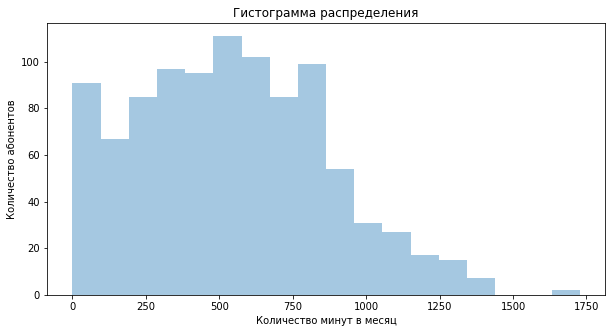

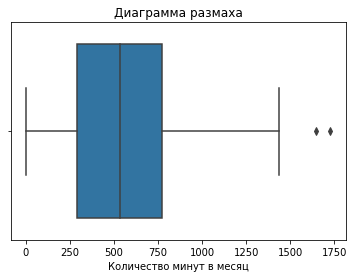

Среднее количество: 540.78
Дисперсия: 106105.73
Стандартное отклонение: 325.74
	


In [37]:
    fig, ax = plt.subplots(figsize=[10,5])
    sns.distplot(ultra_data['minutes'], kde=False)
    ax.set_title('Гистограмма распределения')
    ax.set_xlabel('Количество минут в месяц')
    ax.set_ylabel('Количество абонентов')
    plt.show()
    
    
    sns.boxplot('minutes', data=ultra_data).set(title='Диаграмма размаха', xlabel = 'Количество минут в месяц')
    plt.show()
    
    print('Среднее количество: {:.2f}'.format(ultra_data['minutes'].mean()))
    print('Дисперсия: {:.2f}'.format(np.var(ultra_data['minutes'], ddof=1)))
    print('Стандартное отклонение: {:.2f}'.format(ultra_data['minutes'].std()))
    print('\t')


Среднее количество примерно равно медиане, стандартное отклонение меньше среднего. Распределение абонентов по потраченным минутам стремится к нормальному, при этом диаграмма размаха смещена влево, что говорит нам о том, что большая часть абонентов разговаривает до 750 минут в месяц. ВИдно, что верхнее предельное значение - 1400 минут, после него - те редкие значения, которые стоит исключить из датасета для исключения ошибок при последующей статистической проверки гипотез.

Все пользователи укладываются в лимит 3000 минут в месяц, несмотря на выбросы.


#### Сколько гигабайтов тратят абоненты тарифа Ультра ежемесячно?

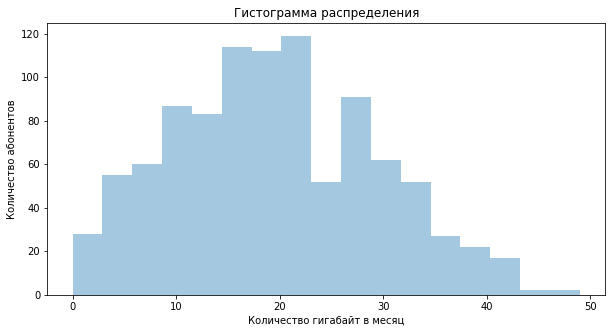

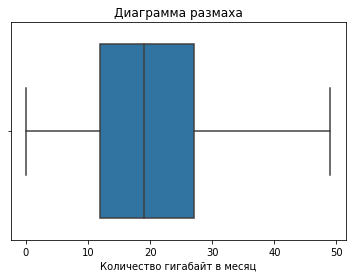

Среднее количество: 19.53
Дисперсия: 97.27
Стандартное отклонение: 9.86
	


In [38]:
    fig, ax = plt.subplots(figsize=[10,5])
    sns.distplot(ultra_data['gb_per_month'], kde=False)
    ax.set_title('Гистограмма распределения')
    ax.set_xlabel('Количество гигабайт в месяц')
    ax.set_ylabel('Количество абонентов')
    plt.show()
    
    
    sns.boxplot('gb_per_month', data=ultra_data).set(title='Диаграмма размаха', xlabel = 'Количество гигабайт в месяц')
    plt.show()
    
    print('Среднее количество: {:.2f}'.format(ultra_data['gb_per_month'].mean()))
    print('Дисперсия: {:.2f}'.format(np.var(ultra_data['gb_per_month'], ddof=1)))
    print('Стандартное отклонение: {:.2f}'.format(ultra_data['gb_per_month'].std()))
    print('\t')


Стандартное отклонение ниже среднего, среднее и медиана примерно равны и составляют около 19 Гб. Видно, что распределение стремится к нормальному, при этом смещено влево.

Большая часть пользователей укладывается в лимит 30 Гб. Однако предельное значение, согласно диаграмме размаха, примерно 47 Гб. После него можно увидеть редкие значения, которые тоже стоит убрать.

#### Сколько сообщений отправляют абоненты тарифа Ультра ежемесячно?

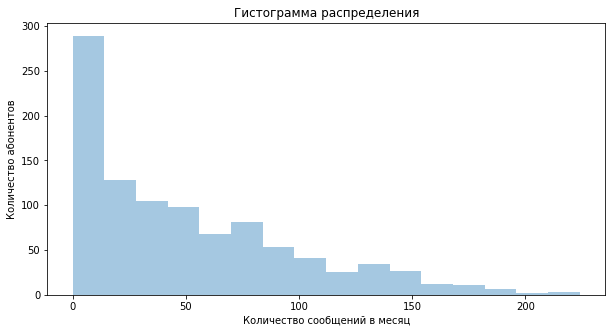

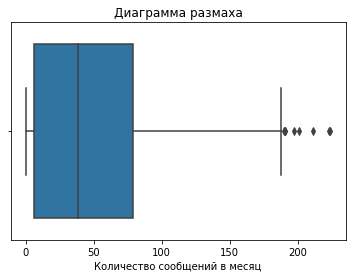

Среднее количество: 49.36
Дисперсия: 2285.27
Стандартное отклонение: 47.80
	


In [39]:
    fig, ax = plt.subplots(figsize=[10,5])
    sns.distplot(ultra_data['messages'], kde=False)
    ax.set_title('Гистограмма распределения')
    ax.set_xlabel('Количество сообщений в месяц')
    ax.set_ylabel('Количество абонентов')
    plt.show()
    
    
    sns.boxplot('messages', data=ultra_data).set(title='Диаграмма размаха', xlabel = 'Количество сообщений в месяц')
    plt.show()
    
    print('Среднее количество: {:.2f}'.format(ultra_data['messages'].mean()))
    print('Дисперсия: {:.2f}'.format(np.var(ultra_data['messages'], ddof=1)))
    print('Стандартное отклонение: {:.2f}'.format(ultra_data['messages'].std()))
    print('\t')

Стандартное отклонение примерно равно среднему значению, медиана - чуть меньше. Скорее всего, влияют редкие значения больше 170 сообщений в день. При этом распределение смещено влево, показывая нам, что более 75 % абонентов тарифа **Ультра** используют ниже 80 сообщений в месяц. 

Абсолютно все пользователи при этом укладываются в лимит в 1000 сообщений, не смотря на выбросы. Выбросы все же мы улалим для исключения ошибок при стат. проверке гипотез.

**Абоненты тарифа Ультра платят только абонентскую плату и не выходят за рамки пакетов минут и сообщений. А интернет - вещь более непредсказуемая. Все же некоторая часть пользователей добирает гигабайты сверх 30гб в месяц.**

### Абоненты тарифа Смарт

#### Сколько разговаривают абоненты тарифа Смарт ежемесячно?

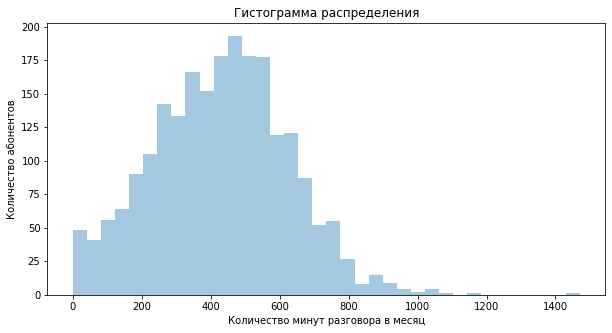

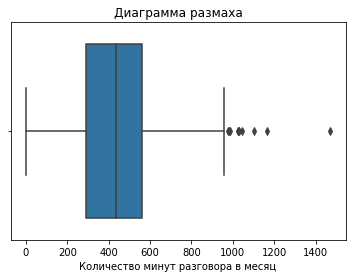

Среднее количество: 429.45
Дисперсия: 37974.77
Стандартное отклонение: 194.87
	


In [40]:
    fig, ax = plt.subplots(figsize=[10,5])
    sns.distplot(smart_data['minutes'], kde=False)
    ax.set_title('Гистограмма распределения')
    ax.set_xlabel('Количество минут разговора в месяц')
    ax.set_ylabel('Количество абонентов')
    plt.show()
    
    
    sns.boxplot('minutes', data=smart_data).set(title='Диаграмма размаха', xlabel = 'Количество минут разговора в месяц')
    plt.show()
    
    print('Среднее количество: {:.2f}'.format(smart_data['minutes'].mean()))
    print('Дисперсия: {:.2f}'.format(np.var(smart_data['minutes'], ddof=1)))
    print('Стандартное отклонение: {:.2f}'.format(smart_data['minutes'].std()))
    print('\t')

    

Среднее значение - 430 минут. Отклонение ниже среднего. Распределение вероятностей по этому признаку стремится к нормальному. Среднее количество примерно равно медиане.

Диаграмма размаха расположена примерно равномерно. ВИдно, что верхнее предельное значение около 970 минут, после него - те редкие значения, которые стоит исключить из датасета для исключения ошибок при последующей статистической проверки гипотез.

Чуть больше половины пользователей с тарифом Смарт укладываются в 500 включенных в тариф минут. Однако очень многим приходится докупать минуты общения, видимо, к концу месяца.


#### Сколько гигабайтов тратят абоненты тарифа Смарт ежемесячно?

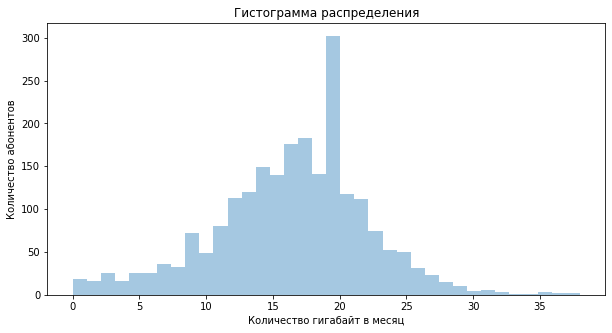

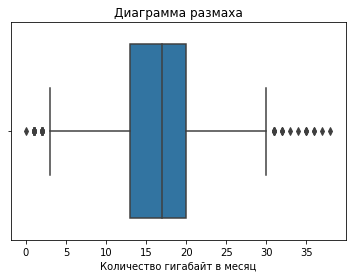

Среднее количество: 16.37
Дисперсия: 33.19
Стандартное отклонение: 5.76
	


In [41]:
    fig, ax = plt.subplots(figsize=[10,5])
    sns.distplot(smart_data['gb_per_month'], kde=False)
    ax.set_title('Гистограмма распределения')
    ax.set_xlabel('Количество гигабайт в месяц')
    ax.set_ylabel('Количество абонентов')
    plt.show()
    
    
    sns.boxplot('gb_per_month', data=smart_data).set(title='Диаграмма размаха', xlabel = 'Количество гигабайт в месяц')
    plt.show()
    
    print('Среднее количество: {:.2f}'.format(smart_data['gb_per_month'].mean()))
    print('Дисперсия: {:.2f}'.format(np.var(smart_data['gb_per_month'], ddof=1)))
    print('Стандартное отклонение: {:.2f}'.format(smart_data['gb_per_month'].std()))
    print('\t')


Стандартное отклонение ниже среднего, среднее и медиана примерно равны и составляют около 16 Гб. Видно, что распределение стремится к нормальному. 

Даже в среднем абоненты превышают установленный тарифом лимит в 15 гб на 2 гб. И приходится докупать пакеты интернета. Это неудобно. Так же есть редкие и выбивающиеся значения за пределами усов ящика - ниже 2-3 Гб и больше 30. Стоит их исключить.

#### Сколько сообщений отправляют абоненты тарифа Смарт ежемесячно?

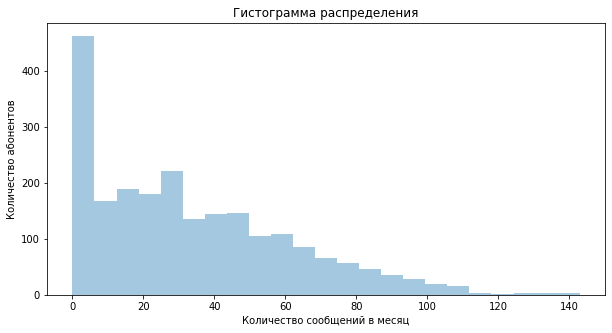

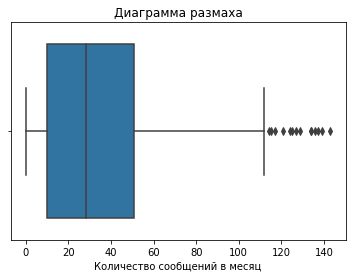

Среднее количество: 33.38
Дисперсия: 796.81
Стандартное отклонение: 28.23
	


In [42]:
    fig, ax = plt.subplots(figsize=[10,5])
    sns.distplot(smart_data['messages'], kde=False)
    ax.set_title('Гистограмма распределения')
    ax.set_xlabel('Количество сообщений в месяц')
    ax.set_ylabel('Количество абонентов')
    plt.show()
    
    
    sns.boxplot('messages', data=smart_data).set(title='Диаграмма размаха', xlabel = 'Количество сообщений в месяц')
    plt.show()
    
    print('Среднее количество: {:.2f}'.format(smart_data['messages'].mean()))
    print('Дисперсия: {:.2f}'.format(np.var(smart_data['messages'], ddof=1)))
    print('Стандартное отклонение: {:.2f}'.format(smart_data['messages'].std()))
    print('\t')

Стандартное отклонение примерно равно среднему значению, медиана - чуть меньше. Скорее всего, влияют редкие значения больше 110-115 сообщений в день. При этом распределение смещено влево, показывая нам, что более 75 % абонентов тарифа **Ультра** используют ниже 60 сообщений в месяц (или 2 сообщения в день). 

Как и клиенты с тарифом **Ультра**, очень многие клиенты **Смарт** вообще не пользуется обычными SMS. ВИдимо, тоже предпочитают интернет. Однако примерно 1/4 пользователей не хватает 50 сообщений в месяц. 


**В тарифе Смарт многие пользователи не ограничиваются ежемесячным платежом в 500 рублей. Всего не хватает: и интернета, и минут, и сообщений.**

### Удаление редких и выбивающихся значений

#### Абоненты тарифа Ультра

Найдем межквартильный размах и предельное верхнее значения для каждого из признаков.

In [43]:
IQR_minutes_ultra = ultra_data['minutes'].quantile(0.75) - ultra_data['minutes'].quantile(0.25)
upper_limit_minutes_ultra = ultra_data['minutes'].quantile(0.75) + 1.5*IQR_minutes_ultra

IQR_gb_ultra =  ultra_data['gb_per_month'].quantile(0.75) - ultra_data['gb_per_month'].quantile(0.25)
upper_limit_gb_ultra = ultra_data['gb_per_month'].quantile(0.75) + 1.5*IQR_gb_ultra

IQR_messages_ultra =  ultra_data['messages'].quantile(0.75) - ultra_data['messages'].quantile(0.25)
upper_limit_messages_ultra = ultra_data['messages'].quantile(0.75) + 1.5*IQR_messages_ultra

Убираем все значения выше, чем верхние предельные значения.

In [44]:
ultra_data = ultra_data[
    (ultra_data['minutes'] <= upper_limit_minutes_ultra)&(ultra_data['gb_per_month']<= upper_limit_gb_ultra)
    &(ultra_data['messages']<= upper_limit_messages_ultra)]
ultra_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 0 to 984
Data columns (total 8 columns):
user_id         975 non-null int64
month           975 non-null int64
gb_per_month    975 non-null int64
calls_count     975 non-null int64
minutes         975 non-null int64
messages        975 non-null int64
tariff_name     975 non-null object
revenue         975 non-null int64
dtypes: int64(7), object(1)
memory usage: 68.6+ KB


#### Абоненты тарифа Ультра

Найдем межквартильный размах и предельное верхнее (а для гигабайт интернета и нижнее согласно диаграмме размаха) значения для каждого из признаков.

In [45]:
IQR_minutes_smart = smart_data['minutes'].quantile(0.75) - smart_data['minutes'].quantile(0.25)
upper_limit_minutes_smart = smart_data['minutes'].quantile(0.75) + 1.5*IQR_minutes_smart

IQR_gb_smart =  ultra_data['gb_per_month'].quantile(0.75) - smart_data['gb_per_month'].quantile(0.25)
upper_limit_gb_smart = smart_data['gb_per_month'].quantile(0.75) + 1.5*IQR_gb_smart
lower_limit_gb_smart = smart_data['gb_per_month'].quantile(0.25) - 1.5*IQR_gb_smart

IQR_messages_smart =  smart_data['messages'].quantile(0.75) - smart_data['messages'].quantile(0.25)
upper_limit_messages_smart = smart_data['messages'].quantile(0.75) + 1.5*IQR_messages_smart

Убираем все значения выше, чем верхние предельные значения и ниже, чем нижние предельные значения.

In [46]:
smart_data = smart_data[
    (smart_data['minutes'] <= upper_limit_minutes_smart)&(smart_data['gb_per_month']<= upper_limit_gb_smart)&
    (smart_data['gb_per_month']>= lower_limit_gb_smart)&(smart_data['messages']<= upper_limit_messages_smart)]
smart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 985 to 3213
Data columns (total 8 columns):
user_id         2205 non-null int64
month           2205 non-null int64
gb_per_month    2205 non-null int64
calls_count     2205 non-null int64
minutes         2205 non-null int64
messages        2205 non-null int64
tariff_name     2205 non-null object
revenue         2205 non-null int64
dtypes: int64(7), object(1)
memory usage: 155.0+ KB


In [47]:
display(ultra_data.describe())
display(smart_data.describe())

,user_id,month,gb_per_month,calls_count,minutes,messages,revenue
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,1263.370256,8.240000,19.471795,73.259487,539.772308,48.139487,2068.615385
std,140.895892,2.869839,9.825530,43.306929,321.146773,45.931015,375.117546
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,1143.000000,6.000000,12.000000,41.000000,293.500000,6.000000,1950.000000
50%,1277.000000,9.000000,19.000000,74.000000,532.000000,38.000000,1950.000000
75%,1381.000000,11.000000,27.000000,103.000000,772.000000,78.000000,1950.000000
max,1495.000000,12.000000,49.000000,196.000000,1437.000000,188.000000,4800.000000


,user_id,month,gb_per_month,calls_count,minutes,messages,revenue
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,1245.663039,8.326077,16.321542,57.980952,425.593197,32.760998,1295.373243
std,146.323549,2.922203,5.732744,25.343209,189.686823,27.295977,803.819539
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1119.000000,6.000000,13.000000,40.000000,289.000000,10.000000,550.000000
50%,1238.000000,9.000000,17.000000,59.000000,433.000000,28.000000,1056.000000
75%,1376.000000,11.000000,20.000000,76.000000,559.000000,50.000000,1750.000000
max,1499.000000,12.000000,37.000000,136.000000,955.000000,112.000000,5790.000000


### Ультра
**Включено 1000 сообщений, 30 Гб, 3000 минут за 1950 руб/мес**

В большинстве случаев пользователи укладываются в стандартный пакет, включенный в тариф, особенно по минутам и сообщениям. Абоненты практически никогда не разговаривают более 1500 минут и не шлют более 200 сообщений в месяц.

Клиенты тарифа **Ультра** разделены на два лагеря - те, кто платит только абонентскую плату (им хватает 30 Гб интернета в месяц) и те, кто платит еще и за дополнительные гигабайты трафика.

### **Смарт**
**Включено 50 сообщений, 15 Гб, 500 минут за 550 руб/мес**

Абоненты данного тарифа в среднем платят не только абонентскую плату, но и за дополнительные минуты, сообщения и гигабайты. Кажется, большинству клиентам **Смарт** нужна более стабильный тариф, с более выгодными предложениями по включенным пакетам опций. Выгодно ли это бизнесу?


Также были убраны все редкие и выбивающие значения в потраченных минутах, гигабайтах и сообщения пользователей каждого тарифа для исключения повяления ошибок, связанных с наличием выбросов, при статистической проверке гипотез.

## <a id="step4"> Шаг 4. Проверка статистических гипотез </a> 

### Различается ли средняя выручка пользователей тарифов «Ультра» и «Смарт»?

In [48]:
X_ultra = ultra_data['revenue']
X_smart = smart_data['revenue']

alpha = 0.05

In [49]:
print(X_ultra.describe())
print(X_smart.describe())

count     975.000000
mean     2068.615385
std       375.117546
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64
count    2205.000000
mean     1295.373243
std       803.819539
min       550.000000
25%       550.000000
50%      1056.000000
75%      1750.000000
max      5790.000000
Name: revenue, dtype: float64


Нам нужно понять, какой из тарифов приносит больше денег. Мы знаем, что 75% абонентов Ультра платят высокую абонентскую плату - 1950 руб. И что 75% абонентов Смарт платят 1672 руб. и ниже. 
Сформулируем следующие гипотезы - средняя выручка обеих тарифов равна и средняя выручка абонентов Ультра больше.

Сформулируем нулевую гипотезу:

Средняя выручка пользователей тарифов Ультра и Смарт равна.

`X_ultra == X_smart`

Сформулируем альтернативную гипотезу:

Средняя выручка пользователей тарифа Ультра больше, чем средняя выручка абонентов Смарт.

`X_ultra != X_smart`

Примем за `alpha` значение, равное 0.5

для того, чтобы использовать критерий Стьюдента для проверки статистической гипотезы, проверим условие на гомогенность дисперсий распределений (наблюдений уже более 30). Сделаем это с помощью теста Левене

In [50]:
from scipy.stats import levene

levene(X_ultra, X_smart)

stat, p_value = levene(X_ultra, X_smart)

print(p_value)

if (p_value < 0.05):
    print('Отвергаем гипотезу о равности дисперсий двух выборок')
else:
    print('Не удалось отвергнуть гипотезу о равности дисперсий двух выборок')


5.054092280097416e-131
Отвергаем гипотезу о равности дисперсий двух выборок


Так как pvalue больше значения alpha, то в соответствиии с тестом Левена, мы jndthuftv гипотезу о равных дисперсиях двух выборок. Значит, считаем дисперсии выборок негомогенными. 

Таким образом, критерий Стьюдента нельзя использовать при проведении статистической проверки гипотезы. Воспользуемся непараметрическим критерием Манна Уитни

In [51]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(X_ultra, X_smart)
print(p_value)

if (p_value / 2 < alpha) and (X_ultra.mean() > X_smart.mean()) :
    print('Отвергаем гипотезу о равности средней выручки абонентов тарифов Ультра и Смарт')
else:
    print('Не удалось отвергнуть гипотезу о равности средней выручки абонентов тарифов Ультра и Смарт')


3.625925964768274e-183
Отвергаем гипотезу о равности средней выручки абонентов тарифов Ультра и Смарт


В наших выборках из 500 человек абоненты тарифа Смарт постоянно платят больше абонентской платы (550 руб/мес), а абоненты тарифа Ультра в основном платят только абонентскую плату, равную 1950 руб/мес.

Полученное значение p-value стремится к 0. Это явно указывает на значимое различие между средней выручкой различных тарифов.

### Различается ли средняя выручка пользователей из Москвы и из других регионов?

In [52]:
display(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Для добавления информации из таблицы `users` необходимо создать общую таблицу `stat_data` из датасетов `ultra_data` и `smart_data`, а также присвоить индекс из столбца `user_id`.

In [53]:
stat_data = pd.concat((ultra_data, smart_data), axis = 0)
display(stat_data.tail())
stat_data.info()
display(stat_data.describe())

,user_id,month,gb_per_month,calls_count,minutes,messages,tariff_name,revenue
3209,1498,10,21,41,258,42,smart,1750
3210,1499,9,2,9,71,11,smart,550
3211,1499,10,18,68,473,48,smart,1150
3212,1499,11,18,74,624,59,smart,1549
3213,1499,12,13,69,505,66,smart,613


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3213
Data columns (total 8 columns):
user_id         3180 non-null int64
month           3180 non-null int64
gb_per_month    3180 non-null int64
calls_count     3180 non-null int64
minutes         3180 non-null int64
messages        3180 non-null int64
tariff_name     3180 non-null object
revenue         3180 non-null int64
dtypes: int64(7), object(1)
memory usage: 223.6+ KB


,user_id,month,gb_per_month,calls_count,minutes,messages,revenue
count,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000
mean,1251.092138,8.299686,17.287421,62.665409,460.600943,37.476101,1532.452201
std,144.889243,2.906069,7.380660,32.704093,243.551486,34.831320,786.272474
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1123.000000,6.000000,13.000000,40.000000,290.000000,9.000000,750.000000
50%,1251.000000,9.000000,17.000000,62.000000,455.000000,30.000000,1680.500000
75%,1379.000000,11.000000,21.000000,82.000000,603.000000,56.000000,1950.000000
max,1499.000000,12.000000,49.000000,196.000000,1437.000000,188.000000,5790.000000


In [55]:
stat_data = stat_data.merge(users[['user_id', 'city']], on='user_id')

Обозначим две переменных, в которых будут храниться данные о средней выручке по регионам и Москве.

In [56]:
X_msc = stat_data.query('city=="Москва"')['revenue']
X_regions = stat_data.query('city!="Москва"')['revenue']

alpha = .05

In [57]:
print(X_msc.describe())
print(X_regions.describe())

count     609.000000
mean     1554.308703
std       744.111498
min       550.000000
25%       831.000000
50%      1760.000000
75%      1950.000000
max      5357.000000
Name: revenue, dtype: float64
count    2571.000000
mean     1527.274990
std       795.983295
min       550.000000
25%       750.000000
50%      1609.000000
75%      1950.000000
max      5790.000000
Name: revenue, dtype: float64


Зрительно эти две выборки распределены примерно одинаково. Тем не менее, мы не можем судить по ним обо всех пользователях без статистической проверки средних.

Сформулируем нулевую гипотезу:

Средняя выручка пользователей с Москвы и регионов равна.

`X_msc == X_regions`

Сформулируем альтернативную гипотезу:

Средняя выручка пользователей с Москвы и регионов не равна.

`X_msc != X_regions`

Примем за `alpha` значение, равное 0.5

для того, чтобы использовать критерий Стьюдента для проверки статистической гипотезы, проверим условие на гомогенность дисперсий распределений (наблюдений уже более 30). Сделаем это с помощью теста Левене

In [58]:
from scipy.stats import levene

print(levene(X_msc, X_regions))


if (levene(X_msc, X_regions)[1] < alpha):
    print('Отвергаем гипотезу о равных дисперсия двух выборок')
else:
    print('Не удалось отвергнуть гипотезу о равных дисперсия двух выборок')

LeveneResult(statistic=6.927663792375936, pvalue=0.008528295990500728)
Отвергаем гипотезу о равных дисперсия двух выборок


Таким образом, критерий Стьюдента нельзя использовать при проведении статистической проверки гипотезы. Воспользуемся непараметрическим критерием Манна Уитни.

In [59]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(X_msc, X_regions)
print(p_value)

if (p_value < 0.05):
    print('Отвергаем гипотезу о равности средней выручки абонентов из Москвы и регионов')
else:
    print('Не удалось отвергнуть гипотезу о равности средней выручки абонентов из Москвы и регионов')



0.1527642244517461
Не удалось отвергнуть гипотезу о равности средней выручки абонентов из Москвы и регионов


Полученное значение p-value показывает, что предположив, что выручки различаются, мы ошибемся в 15 % случаев. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средней выручкой пользователей с Москвы и регионов. 

## <a id="step5"> Шаг 5. Выводы </a> 

При проведении статистической проверки гипотез удалось выяснить, что предположительно, средняя выручка абонентов **Ультра** больше, чем средняя выручка абонентов **Смарт**. 

То есть, не смотря на то, что пользователи тарифа **Ультра** в большинстве своем только абонентскую плату, а абоненты **Смарт** - всегда выше своей абонентской платы, можно сделать вывод, что тариф **Ультра** приносит больше денег.

А пользователям выгоднее быть на тарифе **Смарт**, если они потребляют немного больше, чем включенные в тариф 15 ГБ трафика. Видимо, потребность в покупке дополнительных Гб интернета заставляет думать о меньшем потреблении к концу месяца.

Также не удалось отвергнуть гипотезу о том, что средняя выручка пользователей города Москвы и регионов равны. Это значит, что с большой вероятностью они могут быть равны при сборе данных о всех абонентах Мегалайн.

Таким образом, делать различия между наполнением тарифов для Москвы и других город нет смысла, даже если Москва - бизнес-центр России.